## ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 3: Bangkok Housing Data | Part 3: Interpretation

---

[README](../README.md) | [Part 1: Cleaning Datasets](01_Clean.ipynb) | [Part 2: Regression Model](02_Regression.ipynb) | **Part 3: Interpretation**

---

### Introduction
- We obtain the model which was create during [Part 2: Regression Model](#).
- In this part, we will interpret the finding

### Import
- We import the essential library, i.e., `pandas`,`numpy`,`seaborn`,`matplotlib.pyplot` that helping us to deal with data.

In [7]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import seaborn as sns
sns.set_theme(style = "white", context = "talk")
import matplotlib.pyplot as plt
#plt.style.use("ggplot")
import plotly.express as px

# !pip install missingno
import missingno as msno

### Load and Check data
- The coefficient of model is stored as `model_summary.csv`.

In [9]:
# Load Data
df = pd.read_csv('../data/model_summary.csv')

In [10]:
df

,var,coef,std_err,t,p_value,lower_ci,upper_ci
0,const,"-8,156,850.92","280,025.11",-29.13,0.00,"-8,705,752.46","-7,607,949.38"
1,bedrooms,"480,459.70","45,412.48",10.58,0.00,"391,442.76","569,476.64"
2,baths,"1,135,364.99","43,857.69",25.89,0.00,"1,049,395.72","1,221,334.26"
3,log_floor_area,"1,497,004.88","37,158.48",40.29,0.00,"1,424,167.31","1,569,842.45"
4,floor_level,"29,596.78","1,589.85",18.62,0.00,"26,480.38","32,713.17"
...,...,...,...,...,...,...,...
211,nearest_station_name_S5 Surasak BTS,"1,078,126.04","366,616.96",2.94,0.00,"359,488.29","1,796,763.78"
212,nearest_station_name_S6 Saphan Taksin BTS,"2,034,142.43","263,410.13",7.72,0.00,"1,517,809.35","2,550,475.51"
213,nearest_station_name_S8 Wongwian Yai BTS,"786,236.93","330,122.73",2.38,0.02,"139,134.69","1,433,339.17"
214,nearest_station_name_S9 Pho Nimit BTS,"756,024.13","365,582.96",2.07,0.04,"39,413.23","1,472,635.04"


### Interpretation
- Note that when certain variables are mentioned, it is understood that any other variables not currently discussed are considered constant.

#### Property type
- The baseline property type is Detached House.
- The expected price of a Condo will be approximately 3 million baht higher than that of a Detached House.
- In the case of a Townhouse, the expected price will be approximately 1 million baht lower than that of a Detached House.

In [13]:
df[df['var'].isin(['property_type_Condo', 'property_type_Townhouse'])]

,var,coef,std_err,t,p_value,lower_ci,upper_ci
12,property_type_Condo,"3,010,945.68","214,436.04",14.04,0.00,"2,590,610.99","3,431,280.38"
13,property_type_Townhouse,"-1,095,246.46","47,570.66",-23.02,0.00,"-1,188,493.85","-1,001,999.08"


#### Location
- The baseline province is Bankok. The baseline district is Phra Khanong.
- The expected price of property in Nonthaburi and Samut Prakan are 836k baht and 776k baht cheaper than Bangkok.
- The lowest expected price of property is in Nong Chok, which is 2.27m baht cheaper than in Phra Khanong.
- The highest expected price of property is in Watthana, which is 1.96m baht higher than in Phra Khanong.

In [15]:
df[df['var'].isin(['province_Nonthaburi','province_Samut Prakan'])]

,var,coef,std_err,t,p_value,lower_ci,upper_ci
17,province_Nonthaburi,"-835,918.50","96,816.84",-8.63,0.00,"-1,025,697.60","-646,139.40"
18,province_Samut Prakan,"-776,300.01","101,155.74",-7.67,0.00,"-974,584.17","-578,015.85"


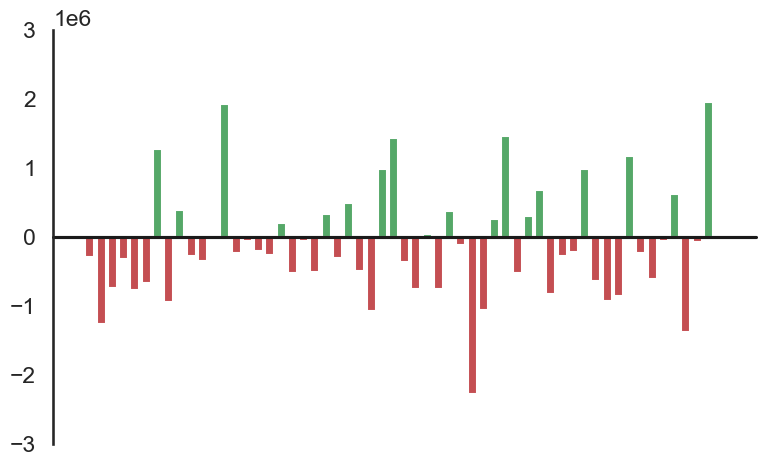

In [16]:
f, ax1 = plt.subplots(1, 1, figsize=(8, 5), sharex = True)


filtered_df = df[df['var'].str.startswith('district')]
x = filtered_df['var']
y = filtered_df['coef']


# Plot the data with color mapping for each bar
colors = ['g' if yi >= 0 else 'r' for yi in y]
for xi, yi, color in zip(x, y, colors):
    ax1.bar(xi, yi, color=color)

ax1.axhline(0, color = "k", clip_on = False)
ax1.set_ylabel('')
ax1.set_xlabel("")

ax1.set_xticks([]) 
ax1.set_xticklabels([])

ax1.set_yticks(ax1.get_yticks())

sns.despine(bottom = True)
plt.tight_layout()

plt.savefig('../images/var_district.png', dpi=300)
plt.show()

In [17]:
df[df['var'].str.contains('district', case = False, na = False)].sort_values(by = 'coef').head(3)

,var,coef,std_err,t,p_value,lower_ci,upper_ci
53,district_Nong Chok,"-2,272,007.52","222,247.18",-10.22,0.00,"-2,707,653.53","-1,836,361.51"
72,district_Thung Khru,"-1,381,397.86","169,039.94",-8.17,0.00,"-1,712,747.72","-1,050,048.00"
20,district_Bang Bon,"-1,256,483.93","264,289.67",-4.75,0.00,"-1,774,541.07","-738,426.80"


In [18]:
df[df['var'].str.contains('district', case = False, na = False)].sort_values(by = 'coef').tail(3)

,var,coef,std_err,t,p_value,lower_ci,upper_ci
56,district_Pathum Wan,"1,467,577.22","305,393.89",4.81,0.00,"868,948.13","2,066,206.31"
31,district_Bang Rak,"1,931,887.45","328,908.62",5.87,0.00,"1,287,165.11","2,576,609.79"
74,district_Watthana,"1,962,196.20","115,112.11",17.05,0.00,"1,736,554.96","2,187,837.44"


#### Nearby Transport Station
- The baseline is the property having no nearby stations.
- A property with many nearby stations has an expected price that is 115k baht higher for each station.
- The expected price decreases by 1.2k baht for each meter further away from the nearest station.
- The property near Kan Kheha BTS is expected to be 624k baht cheaper.
- The property near Silom MRT is expected to be 3.45m baht higher.

In [20]:
df[df['var'].isin(['nearby_stations','nearest_station_distance'])]

,var,coef,std_err,t,p_value,lower_ci,upper_ci
6,nearby_stations,"114,638.24","33,651.32",3.41,0.00,"48,675.36","180,601.12"
7,nearest_station_distance,"-1,232.18",64.98,-18.96,0.00,"-1,359.56","-1,104.80"


In [21]:
df[df['var'].str.contains('nearest_station_name', case = False, na = False)].sort_values(by = 'coef').head(1)

,var,coef,std_err,t,p_value,lower_ci,upper_ci
172,nearest_station_name_N20 Saphan Mai BTS,"-624,475.86","976,837.86",-0.64,0.52,"-2,539,260.59","1,290,308.86"


In [22]:
df[df['var'].str.contains('nearest_station_name', case = False, na = False)].sort_values(by = 'coef').tail(1)

,var,coef,std_err,t,p_value,lower_ci,upper_ci
125,nearest_station_name_BL26 Silom MRT,"3,448,665.67","499,691.56",6.90,0.00,"2,469,176.85","4,428,154.49"


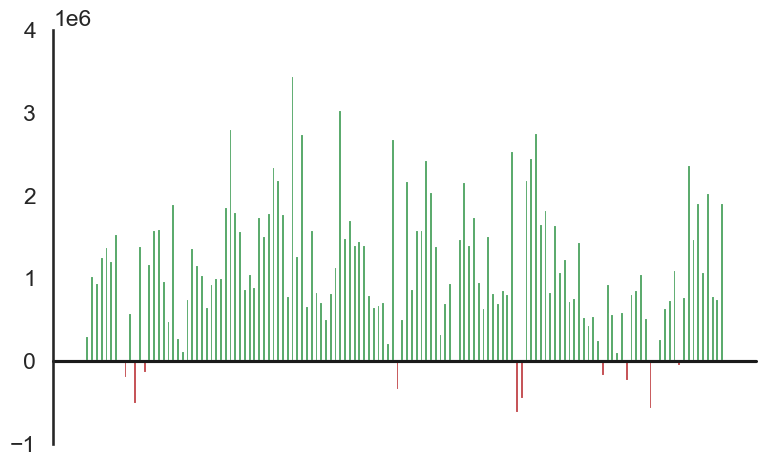

In [23]:
f, ax1 = plt.subplots(1, 1, figsize=(8, 5), sharex = True)


filtered_df = df[df['var'].str.startswith('nearest_station_name')]
x = filtered_df['var']
y = filtered_df['coef']


# Plot the data with color mapping for each bar
colors = ['g' if yi >= 0 else 'r' for yi in y]
for xi, yi, color in zip(x, y, colors):
    ax1.bar(xi, yi, color=color)

ax1.axhline(0, color = "k", clip_on = False)
ax1.set_ylabel('')
ax1.set_xlabel("")

ax1.set_xticks([]) 
ax1.set_xticklabels([])

ax1.set_yticks(ax1.get_yticks())

sns.despine(bottom = True)
plt.tight_layout()

plt.savefig('../images/var_nearest_station_name.png', dpi=300)
plt.show()

#### Area
- Mathematically, since this variable is in logarithmic form, an increase of 1% in floor_area (or land_area) will increase the price by the coefficient, which is approximately 1% as well.
- In this case, a 1% increase in `floor_area` will raise the price by approximately 15,000 baht, while a 1% increase in `land_area` will raise the price by around 6,300 baht.

In [25]:
df[df['var'].isin(['log_floor_area','log_land_area'])]

,var,coef,std_err,t,p_value,lower_ci,upper_ci
3,log_floor_area,"1,497,004.88","37,158.48",40.29,0.00,"1,424,167.31","1,569,842.45"
5,log_land_area,"637,359.17","38,346.82",16.62,0.00,"562,192.24","712,526.09"


#### Bedrooms and Bathrooms
- The bedrooms and bathrooms have interaction effect.
- Suggesting that bathrooms have a significantly larger impact on property value compared to bedrooms.
- Since the bed_bath term has a negative coefficient, having an excessive number of bedrooms or bathrooms may not lead to increased benefits. This suggests that beyond a certain point, adding more bedrooms or bathrooms can actually diminish property value rather than enhance it. Therefore, it is crucial to find a balanced combination of bedrooms and bathrooms to optimize overall property value.
- Properties with many bedrooms (at least 2 in Condos, at least 6 in Detached Houses, and at least 4 in Townhouses) are expected to have prices that are 172k baht higher.

In [27]:
df[df['var'].isin(['bedrooms', 'baths','has_many_bedrooms','bed_bath'])]

,var,coef,std_err,t,p_value,lower_ci,upper_ci
1,bedrooms,"480,459.70","45,412.48",10.58,0.00,"391,442.76","569,476.64"
2,baths,"1,135,364.99","43,857.69",25.89,0.00,"1,049,395.72","1,221,334.26"
9,has_many_bedrooms,"172,150.12","47,899.81",3.59,0.00,"78,257.53","266,042.70"
14,bed_bath,"-169,910.37","10,450.24",-16.26,0.00,"-190,394.80","-149,425.94"


In [28]:
# Define the range for the number of bedrooms and bathrooms
bedrooms = np.arange(1, 5)  # 1 to 4 bedrooms
bathrooms = np.arange(1, 5)  # 1 to 4 bathrooms

# Create a DataFrame to hold the prices
price_data = {}

# Calculate prices for each combination of bedrooms and bathrooms
for b in bedrooms:
    price_row = []
    for ba in bathrooms:
        price = (480459.70) * b + (1135364.99) * ba - (169910.37 * b * ba)  # Price calculation
        price_row.append(price)
    price_data[b] = price_row

# Create a DataFrame with bedrooms as rows and bathrooms as columns
price_df = pd.DataFrame(price_data, index = bathrooms).T

# Set appropriate column and index names
price_df.columns = [f'Bathrooms: {ba}' for ba in bathrooms]
price_df.index.name = 'Bedrooms'

# Display the crosstab
print(price_df)

          Bathrooms: 1  Bathrooms: 2  Bathrooms: 3  Bathrooms: 4
Bedrooms                                                        
1         1,445,914.32  2,411,368.94  3,376,823.56  4,342,278.18
2         1,756,463.65  2,552,007.90  3,347,552.15  4,143,096.40
3         2,067,012.98  2,692,646.86  3,318,280.74  3,943,914.62
4         2,377,562.31  2,833,285.82  3,289,009.33  3,744,732.84


#### Facilities and Supermarkets
- Nearby Supermarkets: Increases the property price by 10k baht per market.
- Bus Stops: Presence of bus stops nearby increases the property price by 185k baht.
- Properties with only parking lot show a negative value of -326,000 baht. This indicates that having just a parking lot is not sufficient to enhance property value.
- To increase the overall value, properties should ideally include additional features such as security and a pool.

In [30]:
df[df['var'].isin(['nearby_supermarkets','has_bus_stops','has_parking','has_security_parking','has_pool_parking'])]

,var,coef,std_err,t,p_value,lower_ci,upper_ci
8,nearby_supermarkets,"10,342.05","3,324.57",3.11,0.00,"3,825.28","16,858.83"
10,has_bus_stops,"185,230.44","33,712.23",5.49,0.00,"119,148.17","251,312.71"
11,has_parking,"-325,789.31","53,184.80",-6.13,0.00,"-430,041.46","-221,537.16"
15,has_security_parking,"205,195.68","60,662.66",3.38,0.00,"86,285.53","324,105.82"
16,has_pool_parking,"340,891.07","44,303.50",7.69,0.00,"254,047.94","427,734.20"


#### Year built


In [32]:
df[df['var'].isin(['year_built_bin_2001_2005'
                   ,'year_built_bin_2006_2010'
                   ,'year_built_bin_2011_2015'
                   ,'year_built_bin_2016_2020'
                   ,'year_built_bin_2021_'
                   ,'year_built_bin__2000'])]

,var,coef,std_err,t,p_value,lower_ci,upper_ci
76,year_built_bin_2001_2005,"-656,372.59","124,591.13",-5.27,0.00,"-900,594.49","-412,150.70"
77,year_built_bin_2006_2010,"-88,815.79","55,490.14",-1.60,0.11,"-197,586.84","19,955.26"
78,year_built_bin_2011_2015,"55,265.01","47,489.78",1.16,0.24,"-37,823.84","148,353.86"
79,year_built_bin_2016_2020,"599,771.46","44,866.72",13.37,0.00,"511,824.30","687,718.61"
80,year_built_bin_2021_,"1,084,013.30","69,272.18",15.65,0.00,"948,226.88","1,219,799.71"
81,year_built_bin__2000,"-893,627.44","124,907.29",-7.15,0.00,"-1,138,469.06","-648,785.81"


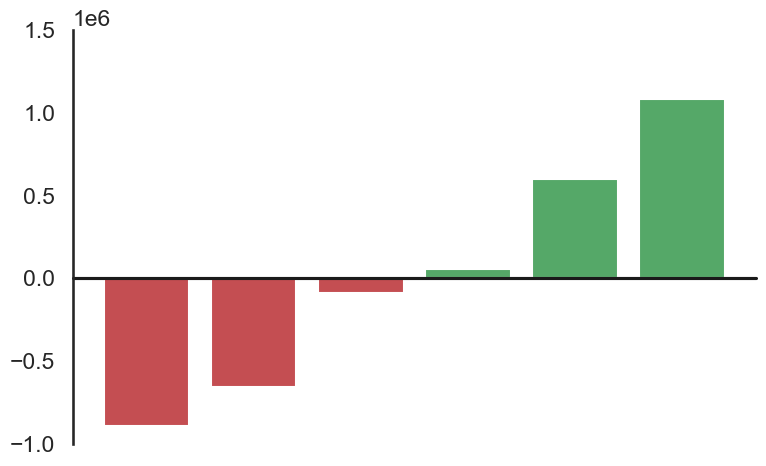

In [56]:
# Make a copy of the filtered DataFrame to avoid the warning
filtered_df = df[df['var'].isin([
    'year_built_bin__2000', 
    'year_built_bin_2001_2005', 
    'year_built_bin_2006_2010', 
    'year_built_bin_2011_2015', 
    'year_built_bin_2016_2020', 
    'year_built_bin_2021_'
])].copy()

# Set the categorical order
filtered_df['var'] = pd.Categorical(filtered_df['var'], 
                                    categories=[
                                        'year_built_bin__2000', 
                                        'year_built_bin_2001_2005', 
                                        'year_built_bin_2006_2010', 
                                        'year_built_bin_2011_2015', 
                                        'year_built_bin_2016_2020', 
                                        'year_built_bin_2021_'
                                    ], 
                                    ordered=True)

# Sort by the specified order
filtered_df = filtered_df.sort_values('var')

# Proceed with plotting as before
f, ax1 = plt.subplots(1, 1, figsize=(8, 5), sharex=True)

x = filtered_df['var']
y = filtered_df['coef']

# Color mapping for each bar based on coefficient value
colors = ['g' if yi >= 0 else 'r' for yi in y]
for xi, yi, color in zip(x, y, colors):
    ax1.bar(xi, yi, color=color)

# Customize plot appearance
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_xticks([])
ax1.set_xticklabels([])
ax1.set_yticks(ax1.get_yticks())

sns.despine(bottom=True)
plt.tight_layout()

# Display plot
plt.show()
